# **Proyek Submission Pertama: House Price Prediction Dataset**

**Nama Lengkap:** Rahmah Fauziah

**ID Peserta:** MC299D5X1751

**Dataset yang digunakan:** https://www.kaggle.com/datasets/jacksondivakarr/house-price-prediction-dataset

## **Data Loading**

Pada tahap ini dilakukan beberapa hal meliputi:

- Import dataset yang akan digunakan untuk menjalankan proyek ini.
- Melakukan load dataset **House Price Prediction**.

Pada tahap ini melakukan import library yang akan digunakan meliputi pandas, numpy, dan sebagainya.

In [1]:
# Import Library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import  OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Pada tahap ini melakukan load dataset dari file csv.

In [2]:
# Load Dataset
url = 'https://raw.githubusercontent.com/rahmahff/Project-MLT/refs/heads/main/MLT%201/csvdata.csv'
house = pd.read_csv(url)
house

,Unnamed: 0,City,Price,Area,Location,No. of Bedrooms
0,0,Bangalore,30000000,3340,JP Nagar Phase 1,4
1,1,Bangalore,7888000,1045,Dasarahalli on Tumkur Road,2
2,2,Bangalore,4866000,1179,Kannur on Thanisandra Main Road,2
3,3,Bangalore,8358000,1675,Doddanekundi,3
4,4,Bangalore,6845000,1670,Kengeri,3
...,...,...,...,...,...,...
29130,7714,Mumbai,14500000,1180,Mira Road East,2
29131,7715,Mumbai,14500000,530,Naigaon East,1
29132,7716,Mumbai,4100000,700,Shirgaon,1
29133,7717,Mumbai,2750000,995,Mira Road East,2


**Output yang dihasilkan:** terdapat 6 kolom meliputi kolom Unnamed: 0, City, Price, Area, Location, dan No. of Bedrooms. Didapatkan pula bahwa jumlah baris dalam dataset ini sebanyak 29.134.

## **Exploratory Data Analysis**

Tahap ini dilakukan untuk mengetahui investigasi awal untuk melakukan analisis karakteristik dari dataset.

Pada tahap ini untuk mengetahui tipe data setiap kolom serta jumlah entri non-null.

In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29135 entries, 0 to 29134
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       29135 non-null  int64 
 1   City             29135 non-null  object
 2   Price            29135 non-null  int64 
 3   Area             29135 non-null  int64 
 4   Location         29135 non-null  object
 5   No. of Bedrooms  29135 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.3+ MB


**Output:** terdapat 2 kolom dengan tipe data object yaitu kolom City dan Location yang merupakan fitur kategorikal. Adapun terdapat 4 kolom numerik dengan tipe data int64 yaitu Unnamed: 0, Price, Area, dan No. of Bedrooms. Untuk kolom yang akan dijadikan target pada dataset ini yaitu kolom Price.

Pada tahap ini untuk mengecek deskripsi statistik data dengan fitur describe(). Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:
- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

In [4]:
house.describe()

,Unnamed: 0,Price,Area,No. of Bedrooms
count,29135.000000,2.913500e+04,29135.000000,29135.000000
mean,3058.808238,1.195267e+07,1301.816475,2.421074
std,1923.174050,2.387647e+07,767.862339,0.821016
min,0.000000,2.000000e+06,200.000000,1.000000
25%,1431.000000,4.179999e+06,870.000000,2.000000
50%,2891.000000,6.884999e+06,1137.000000,2.000000
75%,4539.500000,1.230000e+07,1504.000000,3.000000
max,7718.000000,8.546000e+08,16000.000000,9.000000


  **Output:** diketahui bahwa Unnamed: 0 memiliki nilai mean(3058.808238), min (0.000000), dan max (7718.000000). Price memiliki nilai mean (1.195267e+07), min (2.000000e+06), dan max (8.546000e+08	). Untuk fitur Area memiliki nilai mean (1301.816475), min (200.000000), dan max (16000.000000). Untuk No. of Bedrooms memiliki nilai mean (2.421074), min (1.000000), dan max (9.000000).

Tahap ini untuk melakukan pengecekan terhadap kolom yang memiliki nilai missing values.

In [5]:
# Mengindentifikasi Missing Value
missing_values = house.isnull().sum()
missing_values[missing_values > 0]

,0


**Output:** diketahui bahwa pada dataset ini tidak memiliki nilai missing value di setiap kolomnya sehingga menghasilkan keluaran 0.

Tahap ini untuk mengidentifikasi apakah terdapat baris yang memiliki duplikasi.

In [6]:
# Mengidentifikasi baris duplikat
duplicates = house.duplicated()

print("Baris duplikat:")
print(house[duplicates])

Baris duplikat:
Empty DataFrame
Columns: [Unnamed: 0, City, Price, Area, Location, No. of Bedrooms]
Index: []


**Output:** diketahui bahwa tidak ada baris yang memiliki duplikasi ditunjukkan dengan keluaran `Baris duplikat: Empty DataFrame`

Tahap ini dilakukan untuk melakukan deteksi outlier pada beberapa fitur numerik yaitu fitur Area, Price, dan No. of Bedrooms.

<Axes: xlabel='Area'>

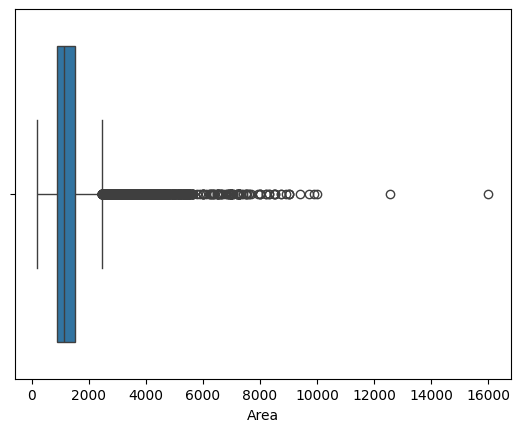

In [7]:
# mengecek outlier
sns.boxplot(x=house['Area'])

<Axes: xlabel='Price'>

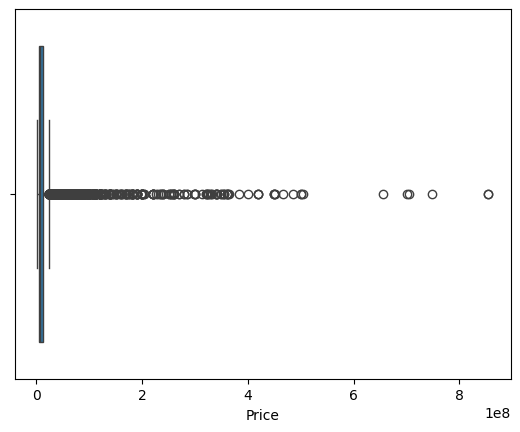

In [8]:
# mengecek outlier
sns.boxplot(x=house['Price'])

<Axes: xlabel='No. of Bedrooms'>

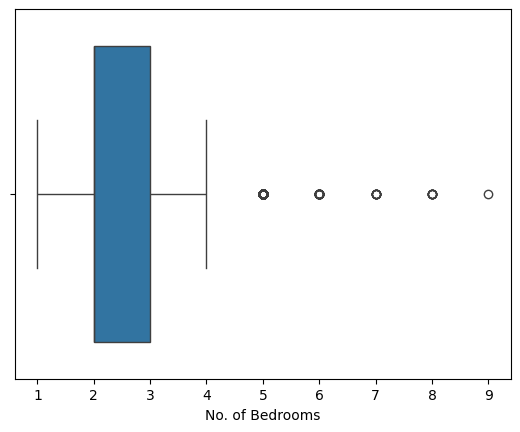

In [9]:
# mengecek outlier
sns.boxplot(x=house['No. of Bedrooms'])

**Output:** diketahui bahwa dari hasil deteksi pada ketiga fitur numerik yaitu Area, Price, dan No. of Bedrooms terdapat outlier.

Tahapan ini dilakukan untuk membagi fitur menjadi dua bagian yaitu numerical_features dan categorical_features.

In [10]:
# univariate analysis
numerical_features = ['Area', 'Price', 'No. of Bedrooms']
categorical_features = ['City', 'Location']

Tahapan ini dilakukan untuk menganalisis fitur kategori yaitu City dan Location.

           jumlah sampel  persentase
City                                
Mumbai              6925        23.8
Kolkata             6275        21.5
Bangalore           5521        18.9
Chennai             4307        14.8
Delhi               4109        14.1
Hyderabad           1998         6.9


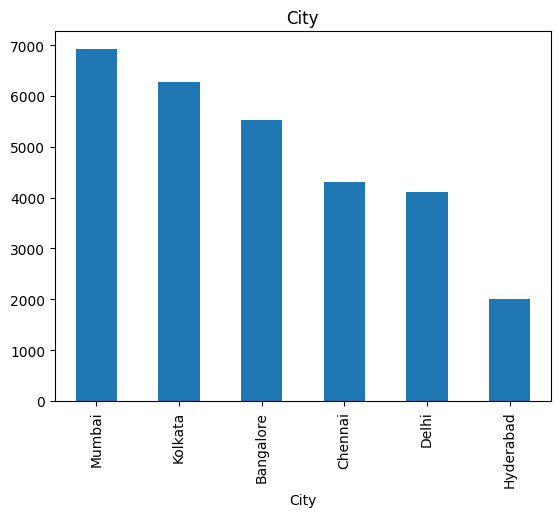

In [11]:
# fitur city - categorical features
feature = categorical_features[0]
count = house[feature].value_counts()
percent = 100*house[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**Output:** Terdapat 6 kategori pada fitur City, secara berurutan dari jumlahnya yang paling banyak yaitu: Mumbai, Kolkata, Bangalore, Chennai, Delhi, dan Hyderabad. Dari data persentase dapat kita simpulkan bahwa lebih dari 45.3% sampel house berasal dari kota Mumbai dan Kolkata.

                jumlah sampel  persentase
Location                                 
New Town                  687         2.4
Kharghar                  566         1.9
Thane West                503         1.7
Mira Road East            453         1.6
Rajarhat                  403         1.4
Uttam Nagar               375         1.3
Tangra                    359         1.2
Noida                     342         1.2
Ulwe                      332         1.1
Dwarka Mor                302         1.0


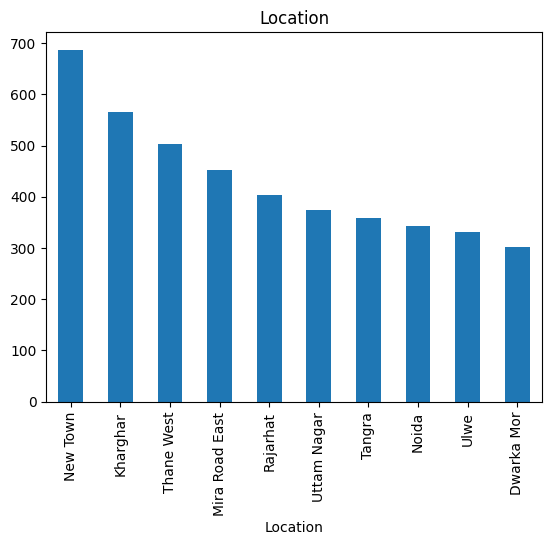

In [12]:
# fitur location - categorical features
value = 10
feature = categorical_features[1]
count = house[feature].value_counts().head(value)
percent = 100*house[feature].value_counts(normalize=True).head(value)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**Output:** Terdapat banyak kategori pada fitur Location. Diambil 10 kategori dengan jumlah paling banyak secara berurutan yaitu: New Town, Kharghar, Thane West, Mira Road East, Rajarhat, Uttam Nagar, Noida, Tangra, Ulwe, dan Dwarka Mor. Dari data persentase dapat kita simpulkan bahwa lokasi rumah terbanyak berada di New Town sebesar 2.5% dari total 645 sampel, dan sisanya tersebar di berbagai lokasi lainnya.

Tahap ini dilakukan untuk melihat histogram dari masing-masing fitur numerik.

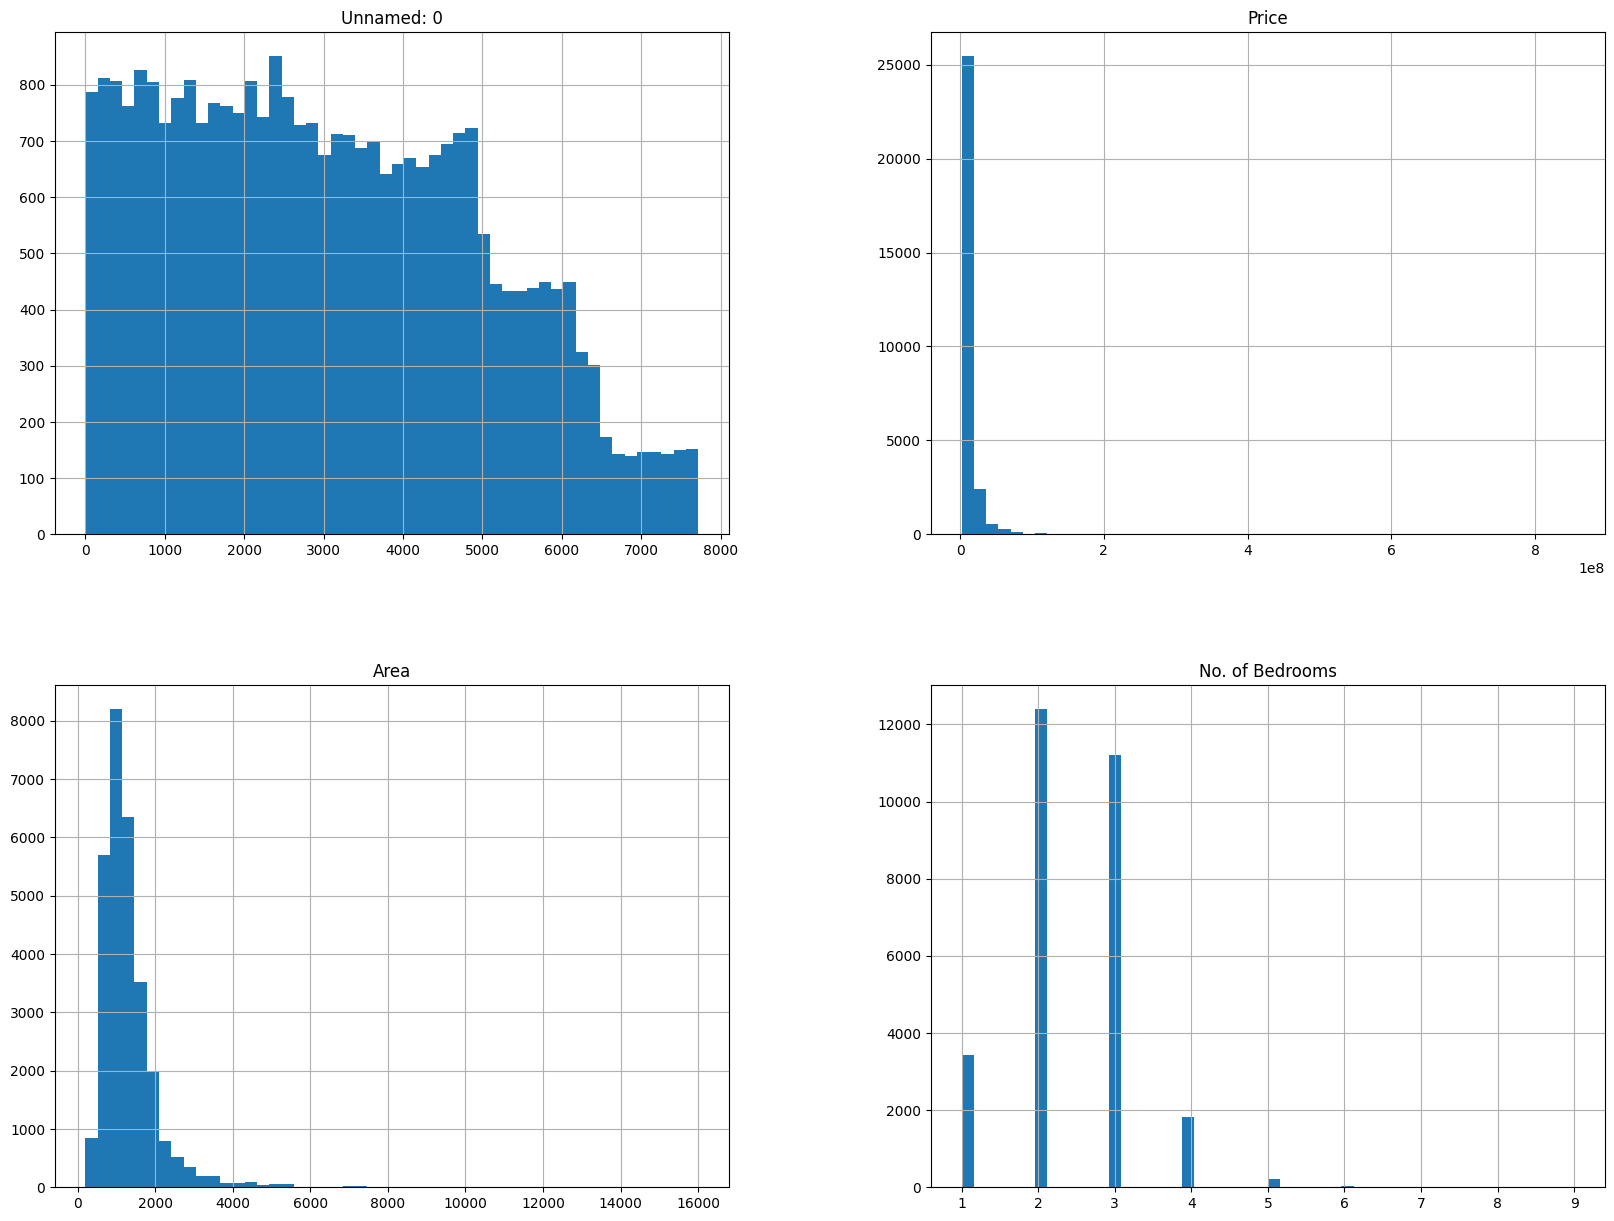

In [13]:
# numerical feature
house.hist(bins=50, figsize=(20,15))
plt.show()

**Output:** fitur Price merupakan target dalam proyek ini menunjukkan grafik mengalami penurunan seiring dengan semakin banyaknya jumlah sampel. Hal ini dapat dikatakan bahwa distribusi harga miring ke kanan atau right-skewed. Rentang harga rumah cukup luas dengan sebagian besar rumah berada di bawah kisaran 10 juta.

Tahap ini digunakan untuk menunjukkan hubungan antara dua atau lebih variabel pada data. Hal ini dimulai dengan mengecek rata-rata harga terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap harga.

<ipython-input-14-2ad68565bd29>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='City', y="Price", kind="bar", dodge=False, height = 4, aspect = 3,  data=house, palette="Set3")
<ipython-input-14-2ad68565bd29>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Location', y="Price", kind="bar", dodge=False, height = 4, aspect = 3,  data=filter_data, palette="Set3")


Text(0.5, 1.0, "Rata-rata 'Price' Relatif terhadap - Location")

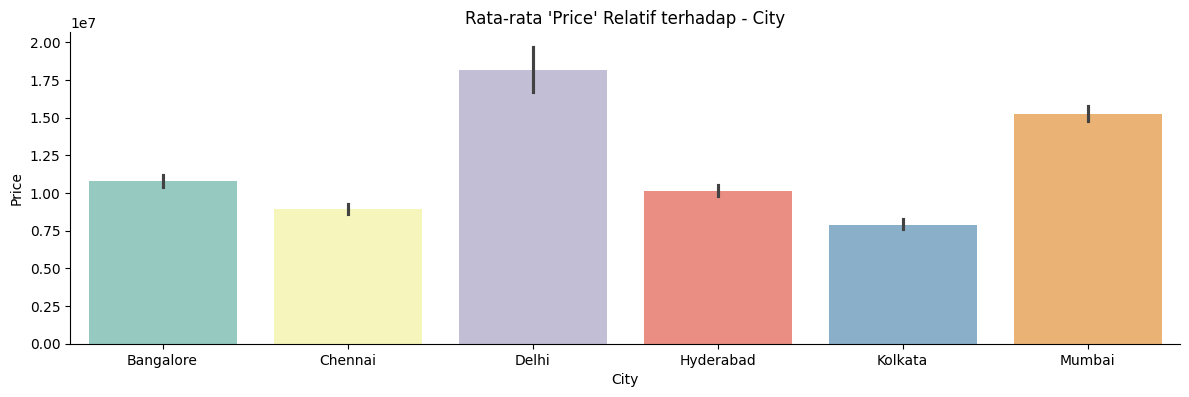

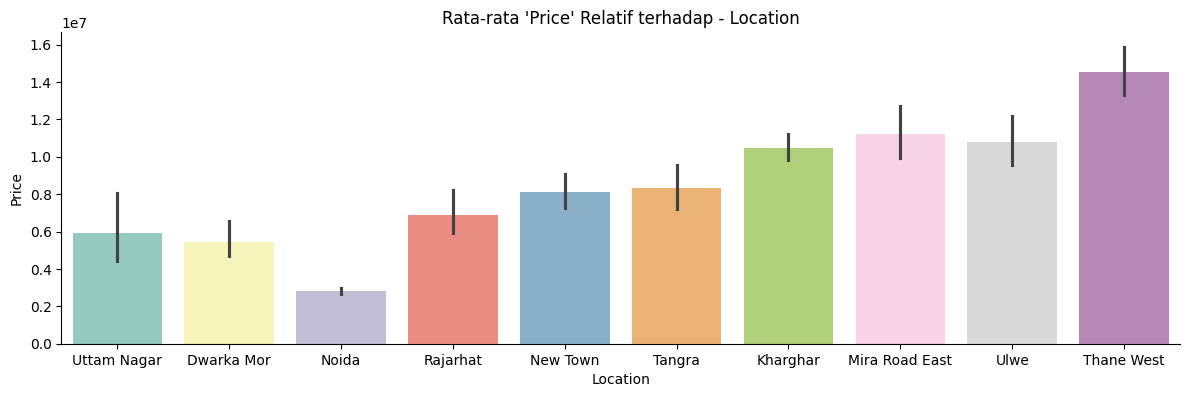

In [14]:
# categorical analysis - multivariate features
value = 10
sns.catplot(x='City', y="Price", kind="bar", dodge=False, height = 4, aspect = 3,  data=house, palette="Set3")
plt.title("Rata-rata 'Price' Relatif terhadap - {}".format('City'))

location = house['Location'].value_counts().head(value).index
filter_data = house[house['Location'].isin(location)]
sns.catplot(x='Location', y="Price", kind="bar", dodge=False, height = 4, aspect = 3,  data=filter_data, palette="Set3")
plt.title("Rata-rata 'Price' Relatif terhadap - {}".format('Location'))

**Output:** Pada fitur City, rata-rata harga cenderung bervariasi, di mana harga terendah sekitar 5,9 juta di kota Kolkata dan tertinggi berada di kota Mumbai dengan harga sekitar 9,8 juta. Dapat dikatakan bahwa kota Mumbai memiliki harga tertinggi dan terendah di kota Kolkata, sehingga fitur City memiliki pengaruh terhadap rata-rata harga rumah. Untuk fitur Location, perbedaan harga antar lokasi cukup signifikan mengingat lokasinya sangat bervariasi, sehingga hanya diambil 10 lokasi saja untuk direpresentasikan pada histogram tersebut. Lokasi yang memiliki harga tertinggi yaitu Thane West sekitar 10 juta, diikuti dengan Kharghar 9 jutaan, dan Mira Road East 8 jutaan. Untuk lokasi dengan rata-rata harga terendah yaitu berada dalam rentang harga 3-4 jutaan yaitu pada lokasi Noida, Uttam Nagar, dan Dwarka Mor. Dapat dikatakan bahwa Location memiliki pengaruh terhadap rata-rata harga rumah.

Tahapan ini dilakukan untuk mengobservasi hubungan antara fitur numerik dengan fitur target menggunakan fungsi pairplot()

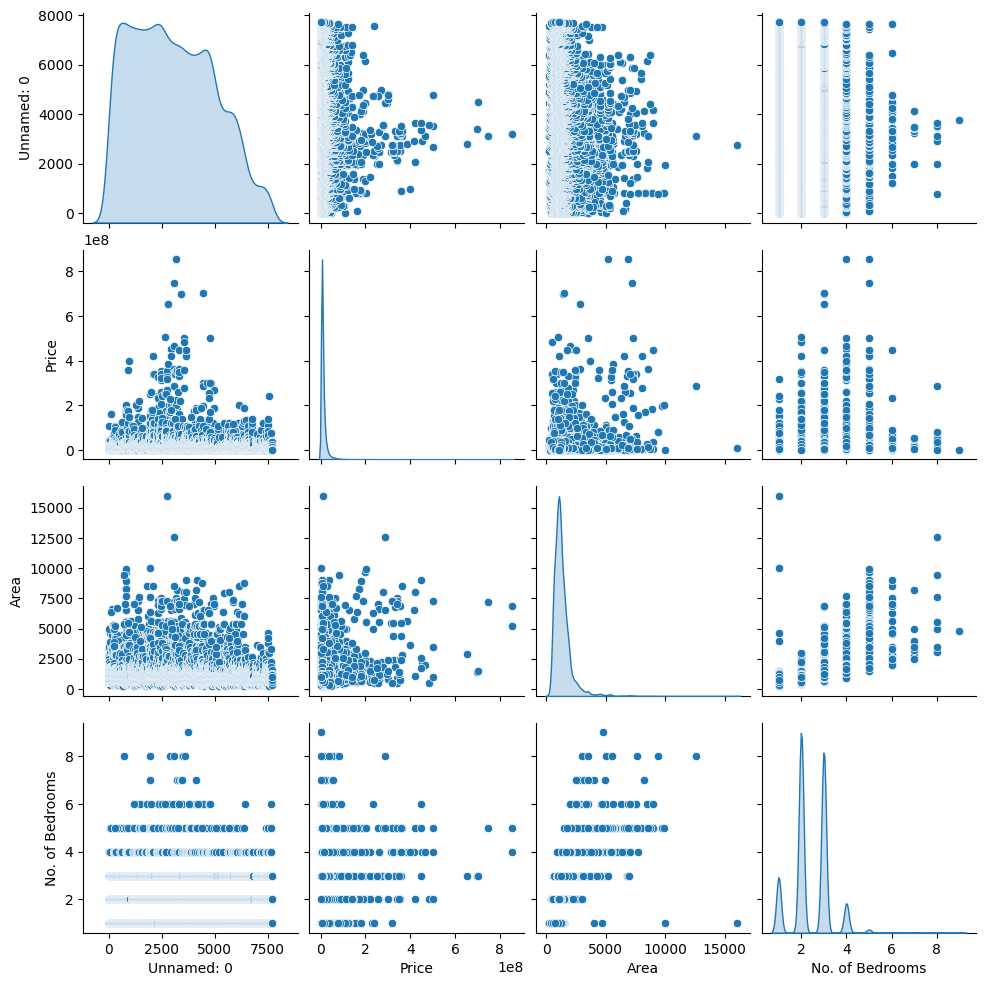

In [15]:
# numerical analysis - multivariate features (Mengamati hubungan antar fitur numerik dengan fungsi pairplot())
sns.pairplot(house, diag_kind = 'kde')

**Output:** diketahui bahwa relasi fitur Area terhadap fitur Price, di mana titik-titik tersebar cukup merata memenuhi seluruh area plot. Dapat dikatakan bahwa terdapat korelasi antara Area dengan Price namun tidak terlalu kuat. Untuk fitur No. of Bedrooms menunjukkan titik-titik yang vertikal terhadap jumlah kamar, di mana banyaknya kamar tidur dapat mempengaruhi harga rumah, sehingga Price dengan No. of Bedrooms memiliki korelasi yang lemah.

Tahapan ini untuk melihat hubungan korelasi matrix antar fitur numerik.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

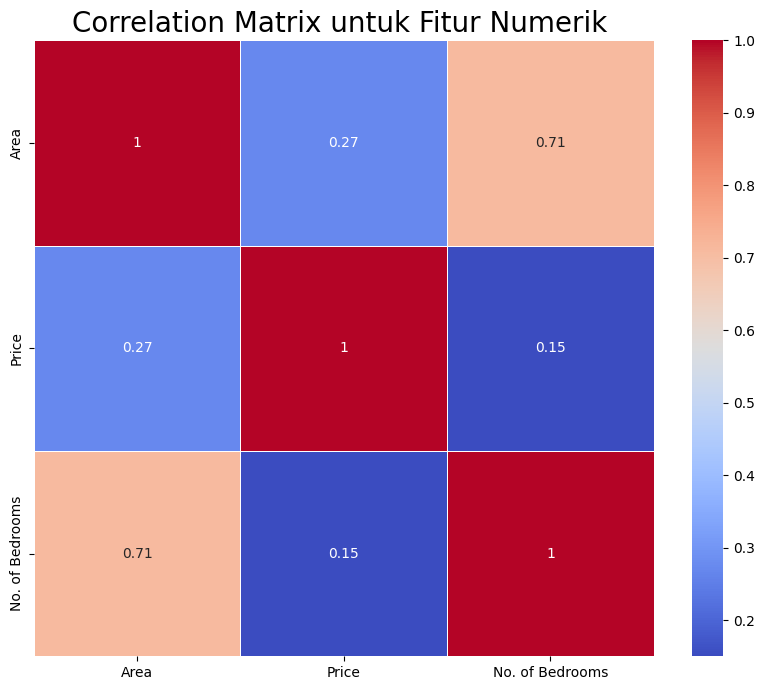

In [16]:
plt.figure(figsize=(10, 8))
correlation_matrix = house[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

**Output:** hasil correlation matrix di mana untuk fitur Area memiliki korelasi positif sebesar 0.3, yang menunjukkan adanya hubungan dengan fitur Price. Untuk No. of Bedrooms memiliki korelasi 0.15 terhadap Price, yang menunjukkan hubungannya lemah. Namun, untuk fitur Area dan No. of Bedrooms memiliki korelasi yang cukup kuat yaitu sebesar 0.74.

## **Data Preparation**

Tahapan ini adalah tahapan untuk melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan. Adapun tahap preparation berikut ini.
- Penangan outlier
- Encoding fitur kategori
- Pembagian dataset dengan fungsi train_test_split.
- Standarisasi.

Tahapan penanganan outlier dilakukan pada fitur numerik yaitu Area, Price, dan No. of Bedrooms menggunakan metode IQR (Inter Quartile Range). Proses ini dilakukan untuk mengidentifikasi outlier yang berada di luar Q1 dan Q3. Nilai apa pun yang berada di luar batas ini dianggap sebagai outlier.

In [17]:
# Ambil hanya kolom numerikal
numeric_cols = house.select_dtypes(include='number').columns
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
Q1 = house[numeric_cols].quantile(0.25)
Q3 = house[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((house[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (house[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
house = house[filter_outliers]
# Cek ukuran dataset setelah outlier dihapus
house.shape

(25532, 6)

**Output:** dataset telah dibersihkan dari outlier dan memiliki jumlah sampel sebanyak 25.532.

Tahapan Encoding dilakukan untuk mengubah nilai kategori menjadi bentuk biner menggunakan teknik OneHotEncoding. Adapun fitur yang digunakan pada Encoding yaitu City dan Location.

In [18]:
# Encoding Fitur Kategori
house = pd.concat([house, pd.get_dummies(house['City'], prefix='City')],axis=1)
house = pd.concat([house, pd.get_dummies(house['Location'], prefix='Location')],axis=1)
house.drop(['City','Location'], axis=1, inplace=True)
house = house.astype('int64')
house.head()

,Unnamed: 0,Price,Area,No. of Bedrooms,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,...,Location_taloja panchanand,Location_tambaram east,Location_tambaram west,Location_thakur village kandivali east,Location_ulhasnagar 4,Location_vasant vihar thane west,Location_vikaspuri,Location_vile parle west,Location_vrindavan society,Location_west venkatapuram
1,1,7888000,1045,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4866000,1179,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,8358000,1675,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,6845000,1670,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,6797000,1220,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Output:** variabel kategori City dan Location telah berubah menjadi variabel numerik.

Tahapan ini digunakan untuk membagi dataset menjadi data latih (train) dan data uji (test) sebelum membuat model. Untuk proporsi pembagian sebesar 80:20 dengan fungsi train_test_split dari sklearn.

In [19]:
# train test split
X = house.drop(["Price"],axis =1)
y = house["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 25532
Total # of sample in train dataset: 20425
Total # of sample in test dataset: 5107


**Output:** diketahui bahwa jumlah sampel untuk whole dataset sebesar 25.532. Untuk sampel train dataset sebesar 20.425 dan test dataset sebesar 5.107.

Tahapan standarisasi digunakan pada fitur numerik yaitu Area dan No. of Bedrooms dengan menggunakan teknik StandardScaler. Teknik ini bekerja dengan melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.

In [20]:
# standarisasi - standarscaler
numerical_features = ['Area', 'No. of Bedrooms']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

Tahapan di bawah untuk mengecek nilai mean dan standar deviasi setelah proses standarisasi,

In [21]:
X_train[numerical_features].describe().round(4)

,Area,No. of Bedrooms
count,20425.0000,20425.0000
mean,0.0000,-0.0000
std,1.0000,1.0000
min,-2.2543,-1.8303
25%,-0.7180,-0.4438
50%,-0.1271,-0.4438
75%,0.6174,0.9427
max,3.0755,2.3291


In [22]:
X_test[numerical_features].describe().round(4)

,Area,No. of Bedrooms
count,5107.0000,5107.0000
mean,0.0083,0.0139
std,1.0058,1.0167
min,-2.2070,-1.8303
25%,-0.7263,-0.4438
50%,-0.1271,-0.4438
75%,0.6765,0.9427
max,3.0684,2.3291


**Output:** diketahui bahwa nilai mean 0 untuk fitur Area dan No. of Bedrooms serta nilai standar deviasi 1 pada data train dan test.

## **Model Development**
Tahapan ini adalah tahapan Model Development di mana menggunakan algoritma machine learning untuk menjawab problem statement dari tahap business understanding. Pada tahap ini pengembangan model Machine Learning menggunakan 3 algoritma yaitu:
- K-Nearest Neighbor
- Random Forest
- Algoritma Boosting

Tahapan dibawah untuk menyiapkan data frame untuk analisis ketiga model dengan menggunakan algoritma KNN, Random Forest, dan Boosting.

In [23]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

Tahapan di bawah untuk melatih model dengan KNN dengan mengimpor KNeighborsRegressor dan mean_squared_error dari library sklearn.neighbors dan sklearn.metrics. Pada tahap ini menggunakan k = 10 tetangga dan metric Euclidean untuk mengukur jarak antara titik.

In [24]:
# Model Development - KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Tahapan di bawah untuk melatih model menggunakan Random Forest dengan mengimpor RandomForestRegressor dari library scikit-learn. Adapun parameter-parameter yang digunakan:
- n_estimator: jumlah trees (pohon) di forest. Di sini kita set n_estimator=50.
- max_depth: kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.
- random_state: digunakan untuk mengontrol random number generator yang digunakan.
- n_jobs: jumlah job (pekerjaan) yang digunakan secara paralel. Ia merupakan komponen untuk mengontrol thread atau proses yang berjalan secara paralel. n_jobs=-1 artinya semua proses berjalan secara paralel.

In [25]:
# Model Development - Random Forest
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Tahapan di bawah untuk melatih model menggunakan Boosting dengan mengimpor AdaBoostRegressor dari library sklearn.ensemble. Adapun parameter-parameter yang digunakan:
- learning_rate: bobot yang diterapkan pada setiap regressor di masing-masing proses iterasi boosting.
- random_state: digunakan untuk mengontrol random number generator yang digunakan.

In [26]:
# Model Development - Algoritma Boosting
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## **Evaluasi Model**
Tahap ini dilakukan untuk mengetahui performa model yang dilatih.

Tahapan di bawah yaitu melakukan proses scaling pada data latih untuk menghindari kebocoran data. Prosesnya dilakukan terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1.

In [27]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test[numerical_features] = X_test[numerical_features].astype(float)
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Kemudian dilanjutkan dengan kode dibawah untuk evaluasi ketiga model menggunakan metrik MSE. Saat menghitung nilai Mean Squared Error pada data train dan test, kita membaginya dengan nilai 1e3. Hal ini bertujuan agar nilai mse berada dalam skala yang tidak terlalu besar.

In [28]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))

# Panggil mse
mse

,train,test
KNN,16840339303812.019531,26224980016413.128906
RF,9613303955776.796875,30023670100653.316406
Boosting,18904264506932.152344,25418562295376.261719


**Output:** hasil evaluasi menunjukkan bahwa model yang menggunakan algoritma Random Forest memiliki nilai MSE terendah pada data train sebesar `9613303955776.796875`. Namun, nilai MSE terendah untuk data test itu yaitu algoritma Boosting sebesar `25418562295376.261719`.

Tahapan dibawah untuk menginterpretasikan hasil evaluasi ketiga model algoritma melalui plot metrik menggunakan bar chart.

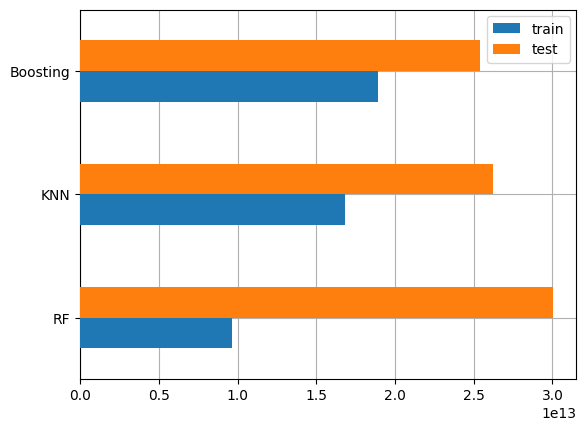

In [29]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

**Output:** dari gambar di atas, model Random Forest (RF) menunjukkan nilai error terkecil pada data train, menunjukkan bahwa model dapat mempelajari pola data latih dengan baik. Untuk data test, model Boosting memiliki error paling rendah, sehingga menunjukkan bahwa model ini memiliki kemampuan generalisasi yang lebih baik. Pada model KNN menunjukkan error yang cukup tinggi pada data train maupun test. Model terbaik yang dipilih untuk membantu memprediksi harga rumah yaitu model algoritma Boosting.

Tahapan di bawah untuk membuat prediksi menggunakan beberapa harga dari data test.

In [30]:
# membuat prediksi menggunakan beberapa harga dari data test
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
7814,2763000,6718600.0,6854925.0,6165064.1


**Output:** diketahui bahwa prediksi untuk model dengan algoritma Boosting yang mendekati dengan nilai y_true dibandingkan dengan dua model lainnya yaitu K-Nearest Neighbor dan Random Forest.